In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 


df_train = pd.read_csv(r"D:\kaggel_project_HCT\train.csv")
df_test = pd.read_csv(r"D:\kaggel_project_HCT\test.csv")

df_train_test = pd.concat([df_train,df_test], axis=0)

print(df_train_test.head(5))
print(df_train_test.info()) 
print(df_train_test.columns.tolist()) 

['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia', 'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status', 'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe', 'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue', 'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_high', 'pulm_moderate', 'hla_low_res_10', 'efs', 'efs_time']


In [ ]:
# Separating Categories and Number Features 
cat_features = df_train_test.select_dtypes(include=['object']).columns
num_features = df_train_test.select_dtypes(include=['number']).columns

# Fill in Mode for Category Features
df_train_test[cat_features] = df_train_test[cat_features].fillna(df_train_test[cat_features].mode().iloc[0])

# Fill in Mean for numeric features 
df_train_test[num_features] = df_train_test[num_features].fillna(df_train_test[num_features].mean())

print("Missing values after filling:", df_train_test.isnull().sum().sum())  # all Missing values chack 

print(df_train_test.shape)


Missing values after filling: 0
(28803, 60)


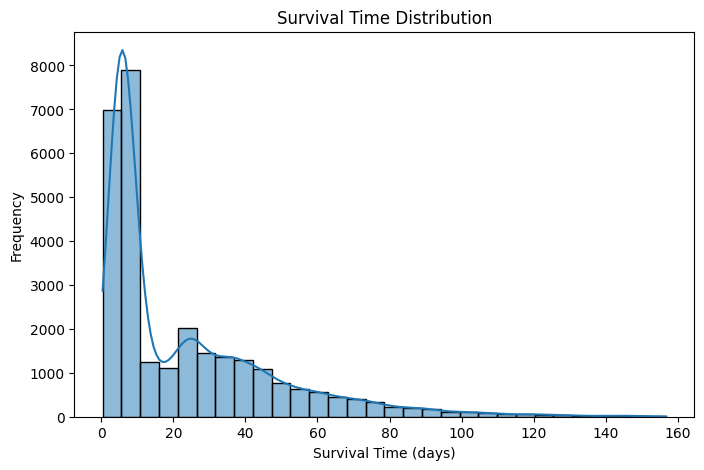

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_train["race_group"], y=df_train["efs_time"])
plt.title("Survival Time by Race")
plt.xlabel("Race")
plt.ylabel("Survival Time")
plt.show()


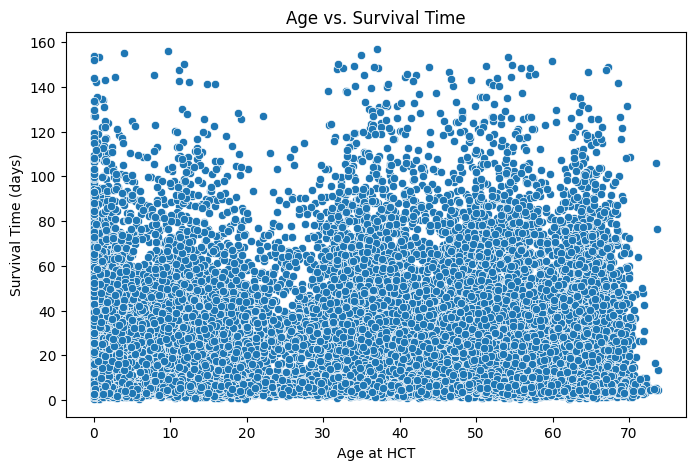

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_train["age_at_hct"], y=df_train["efs_time"])
plt.title("Age vs. Survival Time")
plt.xlabel("Age at HCT")
plt.ylabel("Survival Time (days)")
plt.show()

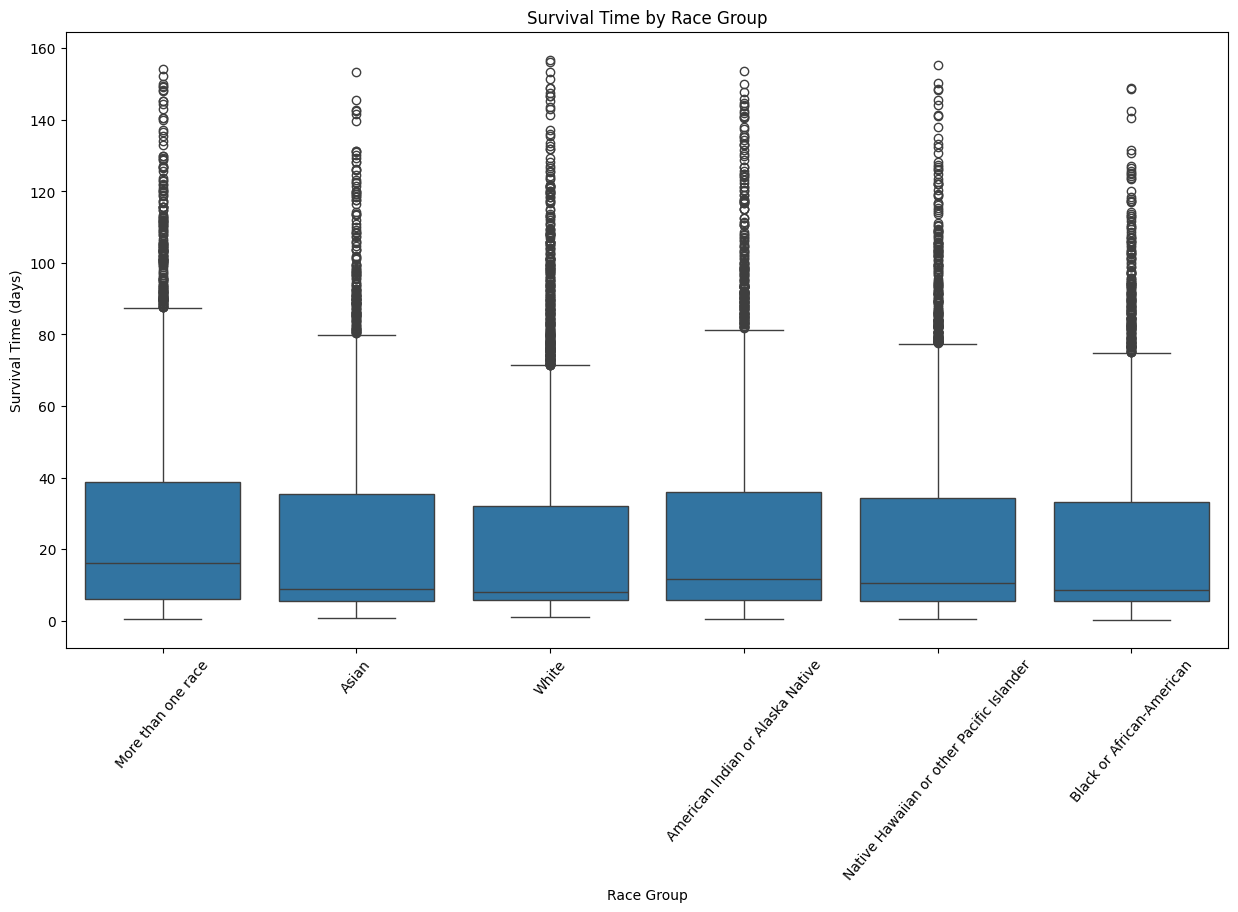

In [41]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_train["race_group"], y=df_train["efs_time"])
plt.title("Survival Time by Race Group")
plt.xlabel("Race Group")
plt.ylabel("Survival Time (days)")
plt.xticks(rotation=50)
plt.show()